# Predicting Review rating from review text

In [1]:
# Loading libraries
import warnings
import nltk
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dependency: pip install tqdm
from tqdm import tqdm_notebook as tqdm

from collections import Counter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <span style="color:dodgerblue"> Linear Support Vector Machine Algorithm </span>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%pylab inline

nltk.download('stopwords')
warnings.filterwarnings('ignore')
os.chdir('/content/drive/My Drive/YelpDataset')

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Displaying max-height of 8000 px without scrolling, for cleaner visual representation
### source : stackoverflow
### https://stackoverflow.com/questions/18770504/resize-ipython-notebook-output-window

In [5]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:2000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [6]:
%%time
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

CPU times: user 21 µs, sys: 5 µs, total: 26 µs
Wall time: 29.3 µs


# Loading data-set
### (reviews dataset with reviews of length 100-200 words for restaurants in Las Vegas)

In [7]:
%%time

#The col_names are 'review_id', 'business_id', 'user_id', 'text', 'stars', 'text length'

reviews_dataset = pd.read_csv('reviews_restaurants_text.csv', low_memory= False)
display(reviews_dataset.head(10))

,review_id,business_id,user_id,text,stars
0,8oFUMhJ7fR2-X3We9TiK7g,kfo1hXvNtGGThfrZGaWtVw,tL2pS5UOmN6aAOi3Z-qFGg,"b""I've been here a few times over the years. I...",4
1,xryg94pDLOO71veGcQINuQ,dfRAK2mgdHbL2_YsFqtCdQ,tL2pS5UOmN6aAOi3Z-qFGg,"b""I used to come here back in the 90s when thi...",1
2,adNS6X4TnaxuFFxzoezGzg,So132GP_uy3XbGs0KNyzyw,tL2pS5UOmN6aAOi3Z-qFGg,"b""I've eaten here a couple of times. Great foo...",5
3,JyOWXyxpN0PmPAF3OXkfCQ,cZBCVzd4lg_jx8IiFz-Iag,tL2pS5UOmN6aAOi3Z-qFGg,"b""Have grabbed a quick bite to eat hear many t...",4
4,ClB81WvkDJwDnHN6evg84w,WzkbnhI-fxdH_tMzT3evtA,tL2pS5UOmN6aAOi3Z-qFGg,b'This is one of the best bars in town. Not ma...,5
5,HBB5H80QrvJO9yp2K8Cnww,-P8dGzSVhJi-5oZ-8U2y0w,tL2pS5UOmN6aAOi3Z-qFGg,"b""We ate here on a recent visit to Vegas. We f...",3
6,D9LnScipvugG-DBMinBNGw,yz2EimDE7bBvq6b4mDe_zg,tL2pS5UOmN6aAOi3Z-qFGg,b'Stopped in here recently for breakfast. \nWe...,2
7,8h8_hkjA76CL0WDwazRqDw,T6VKCBhHojQkCWp_IYO24w,tL2pS5UOmN6aAOi3Z-qFGg,b'Typical McDonalds. Food was typical. Employe...,3
8,xGYGeu0zSTqLsUlG-_h6kQ,SVGApDPNdpFlEjwRQThCxA,tL2pS5UOmN6aAOi3Z-qFGg,b'Stopped in here with my family for dinner to...,4
9,RNLRW8dfpYF2lH75YLPGjQ,QC9bLPcNk6ymAOHf03pHhQ,tL2pS5UOmN6aAOi3Z-qFGg,b'Stopped in here recently to grab a bite on t...,4


CPU times: user 585 ms, sys: 179 ms, total: 765 ms
Wall time: 1.52 s


In [8]:
# reviews_dataset.shape[0] - gives number of row count
print("The total number of Reviews are {}".format(reviews_dataset.shape[0]))

The total number of Reviews are 154737


In [9]:
reviews_dataset.shape

(154737, 5)

###Data Cleansing

In [0]:
import string
def get_clean_text(review_sample):
    
    #Takes in a string of text, then performs the following:
    #1. Performs case normalization
    #2. Remove all punctuation
    #3. Remove all stopwords
    #4. Return the cleaned text as a list of words

    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id']  ## more can also be added upon analysis
    stopwords.extend(newStopWords)
    text = review_sample
    #display(text)
    
    # text format of b'Review_starts' is beacuse of some encofing stuff, so we will remove it to make our review a 
    # string like 'sample review'
    text = text[2: len(review_sample)-1].lower()  ##  case normalization
    #display(text)
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    #display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    clean_text = ""
    for word in l:
        clean_text += str(word)+" "
    
    return clean_text.strip()

In [11]:
# TEST 
# get_clean_text()
review_sample = reviews_dataset.text[28]
display(get_clean_text(review_sample))

'clean fresh grade quality sushi ingredients friendly accommodating staff pleasure food go create burrito bowl add wasabi aioli im telling'

In [0]:
import string
def get_words(text):
    
    '''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id']  ## more can also be added upon analysis
    stopwords.extend(newStopWords)
    
    
    # text format of b'Review_starts' is beacuse of some encofing stuff, so we will remove it to make our review a 
    # string like 'sample review'
    text = text[2: len(review_sample)-1].lower()  ##  case normalization
    #display(text)
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    
    return l, len(l)

In [13]:
for i in range(1):
    review_sample = str(reviews_dataset.text[i])
    #display(review_sample)
    check = get_words(review_sample)
    display(check[0]) # a tuple

"i've been here a few times over the years. i'd probably eat here more if i didn't live on the opposite side of town.  i've always enjoyed my experience here and look forward to eating there again."

'ive been here a few times over the years id probably eat here more if i didnt live on the opposite side of town  ive always enjoyed my experience here and look forward to eating there again'

['times',
 'years',
 'probably',
 'eat',
 'live',
 'opposite',
 'side',
 'town',
 'always',
 'enjoyed',
 'experience',
 'look',
 'forward',
 'eating']

In [14]:
pd.set_option('display.precision', 2)
reviews_dataset.describe()

,stars
count,154737.00
mean,4.08
std,1.29
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [15]:
reviews_dataset["stars"].value_counts()
type(reviews_dataset["stars"].value_counts())

5    85332
4    33569
1    14055
3    13382
2     8399
Name: stars, dtype: int64

pandas.core.series.Series

([<matplotlib.patches.Wedge at 0x7f947e507860>,
 [Text(-0.1770755191496546, 1.0856538400972386, '5-Stars'),
  Text(-0.5897835793738513, -0.9285231981490653, '4-Stars'),
  Text(0.42938375569057347, -1.0127337213448846, '1-Star'),
  Text(0.8998839503094006, -0.632620641439677, '3-Stars'),
  Text(1.084045736733067, -0.1866677279844118, '2-Stars')],
 [Text(-0.0965866468089025, 0.5921748218712211, '55.1%'),
  Text(-0.32170013420391885, -0.5064671989903992, '21.7%'),
  Text(0.23420932128576732, -0.5524002116426642, '9.1%'),
  Text(0.4908457910778548, -0.345065804421642, '8.6%'),
  Text(0.5912976745816728, -0.10181876071877007, '5.4%')])

(-1.1103513751004472,
 1.100492922623831,
 -1.1212902790941763,
 1.1117931366919047)

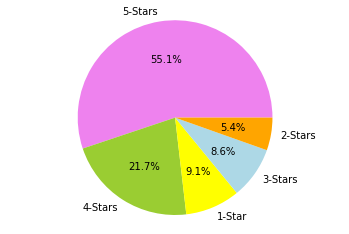

In [16]:
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = reviews_dataset["stars"].value_counts()
colors = ['violet', 'yellowgreen', 'yellow', 'lightblue','orange']
 
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%') 
plt.axis('equal')
plt.show()

#### (Dataset is imbalanced, but it is taken care of by under-sampling when we are using the reviews dataset for recommendations)

### Loading clean data into texts list
####(we're interested in the text of each review and the stars rating, so we load these into separate lists)

In [17]:
%%time

texts = []
stars = [reviews_dataset['stars'] for review in reviews_dataset]
pbar = tqdm(total=reviews_dataset.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    texts.append(get_clean_text(row['text']))
    pbar.update(1)
pbar.close()


CPU times: user 60 s, sys: 3.4 s, total: 1min 3s
Wall time: 1min 3s


#### Vectorizing and tokenizing the Text Data ( the TF-IDF algorithm along with n-grams)

In [18]:
%%time
# Estimated time: 29.8 s
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,3))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(texts)

CPU times: user 22.5 s, sys: 731 ms, total: 23.3 s
Wall time: 23.3 s


## Splitting dataset into Train and test Data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1], test_size=0.15, random_state=42, shuffle =False)

####We now have 15% of our data in X_test and y_test. We’ll teach our system using 85% of the data (X_train and y_train) and then see how well it does by comparing its predictions for the reviews in X_test with the real ratings in y_test.

## Fitting a Classifier and Making Predictions
The classifier we’ll use is a Linear Support Vector Machine (SVM), 
which has been shown to perform well on several text classifications tasks.

In [20]:
%%time

from sklearn.svm import LinearSVC# Estimated time: 12.6 s

classifier = LinearSVC()# initialise the SVM classifier

classifier.fit(X_train, y_train) #train the classifier

CPU times: user 13.8 s, sys: 103 ms, total: 13.9 s
Wall time: 13.9 s


#### Classifier has been fitted, it can now be used to make predictions. Predicting the rating for the first ten reviews in our test set

In [21]:
# Using our trained classifier to predict the ratings from text

preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
display(y_test[:10])
print("Predicted Ratings: ",end = "")
print(preds[:10])

Actual Ratings(Stars): 

131526    3
131527    1
131528    3
131529    3
131530    4
131531    3
131532    5
131533    5
131534    5
131535    2
Name: stars, dtype: int64

Predicted Ratings: [3 2 4 5 5 1 4 4 5 1]


## <span style="color:orangered"> Observations </span>

<b>  Example:
<br> The model predicts a different rating(2) based on features of the review text, for acutal rating index 131527 (which is 1) </b>

In [22]:

predict_all = classifier.predict(vectors)
print(shape(predict_all))

(154737,)


In [23]:
predicted_stars = list(predict_all)

print("Actual Ratings(Stars): ")
print(stars[1][154720:154736])
print("\nPredicted Ratings: ",end = "")
print(predicted_stars[154720:154736])

Actual Ratings(Stars): 
154720    5
154721    3
154722    5
154723    5
154724    4
154725    2
154726    5
154727    5
154728    4
154729    3
154730    5
154731    4
154732    4
154733    3
154734    4
154735    1
Name: stars, dtype: int64

Predicted Ratings: [5, 2, 5, 5, 5, 1, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5]


## Making new CSVs from dataframe

In [24]:
print("\nOriginal Reviews with user bias")
display(reviews_dataset.tail(10))

print("\nUnbiased Reviews with predicted rating using user's review text")
unbiased_reviews_dataset = reviews_dataset

# dropping actual ratings(stars) by user
unbiased_reviews_dataset = unbiased_reviews_dataset.drop('stars', 1)

# adding the unbiased predicted rating
unbiased_reviews_dataset['stars'] = predicted_stars

display(unbiased_reviews_dataset.tail(10))


Original Reviews with user bias


,review_id,business_id,user_id,text,stars
154727,mrZi82Hmgx5UO5gVXLE4Cw,anrLWKAKm3hFLcJpbhEDUg,-Ve_iU4LrfV5hh9Ca8AMkQ,"b""Shane was honestly the funniest and nicest s...",5
154728,zmRR9Sp1um0d2MfyatmUrA,YQ--LJ7pvjiDSqNv0TuKTQ,UBQq6S_FsZQa4J8cS_6Wzw,b'Solid 4-star pizza joint! We had great servi...,4
154729,5aCzF_praG32ikbr4Fj3uw,D8a2usm9b-j89W9IrJ_Evw,Rex_y8h-BRx_Xzc9A6u-_g,"b""I always come here when I'm in Vegas for the...",3
154730,-dr3GveFriZqgw38T1lpMA,rbcfYmJtqwIkk17IeOI5Kw,iI-Tzs2jfDhdOfocBFiLMQ,"b'Great ambiance, excellent cocktails, good se...",5
154731,XIcczbWfDSQoKJBiUEoU2Q,6fPQJq4f_yiq1NHn0fd11Q,IqIpCfg0qDhIkaUJGKzlyw,b'have a crepe in paris :) You can get full of...,4
154732,I1Kt09IdYr6Je9Eikod0jg,hroo5nOO8b9QhHX0GLg7oA,zaasTFLY_SX-2Uj2zlHUmQ,b'Service is fast here n the pho is good along...,4
154733,W5Heng3eRVJJTNVo5gJmSw,DkYS3arLOhA8si5uUEmHOw,AOFDB60pjiXby08lx5HHYQ,"b""Why is this place so highly rated? It's just...",3
154734,ODGDaWgm5gi3NeVDytm9Qw,Xspg78dOvuedvuPEUwZBjw,AOFDB60pjiXby08lx5HHYQ,b'Ordered the extra hot latte. Place is prett...,4
154735,YYMoqTFxli1k9wQceIo_xA,HUKbH7r9TBJPri6LJbBKtw,iXwIKbN2NNlB6QPZwZvrZw,b'All the reviews must be from friends or fami...,1
154736,o-QGNfLQ36FtR-UK5H1TFA,Q7m8G4579-XYKV3LMW8V7g,67tsUtcLuP5mwTFm3-mrzA,"b""Walked across the street from HRH for a late...",4



Unbiased Reviews with predicted rating using user's review text


,review_id,business_id,user_id,text,stars
154727,mrZi82Hmgx5UO5gVXLE4Cw,anrLWKAKm3hFLcJpbhEDUg,-Ve_iU4LrfV5hh9Ca8AMkQ,"b""Shane was honestly the funniest and nicest s...",5
154728,zmRR9Sp1um0d2MfyatmUrA,YQ--LJ7pvjiDSqNv0TuKTQ,UBQq6S_FsZQa4J8cS_6Wzw,b'Solid 4-star pizza joint! We had great servi...,4
154729,5aCzF_praG32ikbr4Fj3uw,D8a2usm9b-j89W9IrJ_Evw,Rex_y8h-BRx_Xzc9A6u-_g,"b""I always come here when I'm in Vegas for the...",5
154730,-dr3GveFriZqgw38T1lpMA,rbcfYmJtqwIkk17IeOI5Kw,iI-Tzs2jfDhdOfocBFiLMQ,"b'Great ambiance, excellent cocktails, good se...",5
154731,XIcczbWfDSQoKJBiUEoU2Q,6fPQJq4f_yiq1NHn0fd11Q,IqIpCfg0qDhIkaUJGKzlyw,b'have a crepe in paris :) You can get full of...,5
154732,I1Kt09IdYr6Je9Eikod0jg,hroo5nOO8b9QhHX0GLg7oA,zaasTFLY_SX-2Uj2zlHUmQ,b'Service is fast here n the pho is good along...,4
154733,W5Heng3eRVJJTNVo5gJmSw,DkYS3arLOhA8si5uUEmHOw,AOFDB60pjiXby08lx5HHYQ,"b""Why is this place so highly rated? It's just...",5
154734,ODGDaWgm5gi3NeVDytm9Qw,Xspg78dOvuedvuPEUwZBjw,AOFDB60pjiXby08lx5HHYQ,b'Ordered the extra hot latte. Place is prett...,4
154735,YYMoqTFxli1k9wQceIo_xA,HUKbH7r9TBJPri6LJbBKtw,iXwIKbN2NNlB6QPZwZvrZw,b'All the reviews must be from friends or fami...,5
154736,o-QGNfLQ36FtR-UK5H1TFA,Q7m8G4579-XYKV3LMW8V7g,67tsUtcLuP5mwTFm3-mrzA,"b""Walked across the street from HRH for a late...",5


In [0]:
# write dataframe to csv
file_name = "/content/drive/My Drive/YelpDataset/reviews_restaurants_text_unbiased_svm.csv"
unbiased_reviews_dataset.to_csv(file_name, encoding='utf-8', index=False)

In [0]:
# testing unbiased rating by loading from new csv file

#new_reviews_dataset = pd.read_csv('reviews_restaurants_text_unbiased_svm.csv', low_memory= False)
#display(new_reviews_dataset.tail(10))

## Evaluating our Classifier

###### The simplest method for evaluating such a system is to see the percentage of the time it accurately predicts the desired answer. This method is called accuracy. We can calculate the accuracy of our system by comparing the predicted reviews and the real reviews. When they are the same, our classifier predicted the review correctly. We sum up all of the correct answers and divide by the total number of reviews in our test set. If this number is equal to 1, it means our classifier was spot on every time.

## <span style="color:orangered"> Accuracy of the model </span>

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.6912239886260825


##### Precision and Recall are better for evaluating rather than using just accuracy measure.

## <span style="color:orangered"> Precision and Recall of the model</span>

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, preds, average='weighted')))

Precision: 0.6520860745033371
Recall: 0.6912239886260825


## <span style="color:orangered"> Classification Report </span>

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.69      0.78      0.74      2120
           2       0.45      0.16      0.24      1257
           3       0.52      0.31      0.39      1957
           4       0.48      0.30      0.37      4920
           5       0.75      0.93      0.83     12957

    accuracy                           0.69     23211
   macro avg       0.58      0.50      0.51     23211
weighted avg       0.65      0.69      0.66     23211



##Plotting Confusion Metrics

In [0]:
# Helper function for plotting confusion metrics

# citation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[ 1657   116    92    68   187]
 [  467   204   247   156   183]
 [  172   116   601   616   452]
 [   56    12   189  1483  3180]
 [   33     3    26   796 12099]]


<Figure size 432x288 with 0 Axes>

Normalized confusion matrix
[[7.82e-01 5.47e-02 4.34e-02 3.21e-02 8.82e-02]
 [3.72e-01 1.62e-01 1.96e-01 1.24e-01 1.46e-01]
 [8.79e-02 5.93e-02 3.07e-01 3.15e-01 2.31e-01]
 [1.14e-02 2.44e-03 3.84e-02 3.01e-01 6.46e-01]
 [2.55e-03 2.32e-04 2.01e-03 6.14e-02 9.34e-01]]


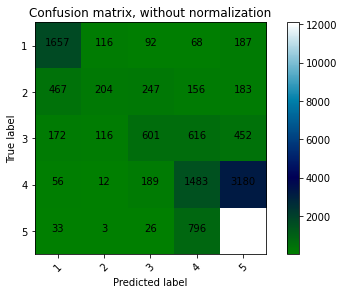

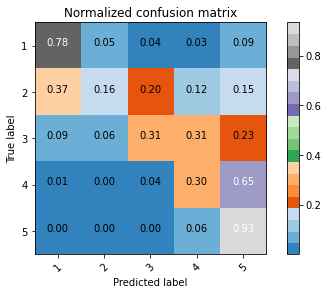

In [43]:
from sklearn import metrics
names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization',cmap='ocean')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix',cmap='tab20c')

plt.show()

# <span style="color:dodgerblue"> Predicting  positive and negative sentiments </span>

In [32]:
# making binary classes
sentiments = []
for star in stars[1]:
    if star <= 3:
        sentiments.append('n')
    if star > 3:
        sentiments.append('p')

print(len(sentiments))        
        
## to see the effect without including 3, we need to undersample

154737


In [33]:
%%time

X2_train, X2_test, y2_train, y2_test = train_test_split(vectors, sentiments, test_size=0.20, random_state=42)

CPU times: user 70.7 ms, sys: 12 ms, total: 82.6 ms
Wall time: 85.8 ms


In [34]:
%%time

classifier2 = LinearSVC()
# train the classifier
classifier2.fit(X2_train, y2_train)

CPU times: user 2.41 s, sys: 19.7 ms, total: 2.43 s
Wall time: 2.45 s


In [35]:
preds2 = classifier2.predict(X2_test)
print("Actual Class:    ",end = "")
print(y2_test[:10])
print("\nPredicted Class: ",end = "")
print(list(preds2[:10]))

Actual Class:    ['p', 'p', 'n', 'p', 'n', 'p', 'p', 'p', 'p', 'n']

Predicted Class: ['p', 'p', 'n', 'p', 'n', 'p', 'p', 'p', 'n', 'p']


## Evaluating our Binary Classifier

## <span style="color:orangered"> Accuracy of the model </span>

In [36]:
print(accuracy_score(y2_test, preds2))

0.9262310973245445


## <span style="color:orangered"> Precision and Recall of the model</span>

In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y2_test, preds2, average='weighted')))
print ('Recall: ' + str(recall_score(y2_test, preds2, average='weighted')))

Precision: 0.924863795989934
Recall: 0.9262310973245445


## <span style="color:orangered"> Classification Report </span>

In [38]:
print(classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           n       0.89      0.77      0.83      7032
           p       0.93      0.97      0.95     23916

    accuracy                           0.93     30948
   macro avg       0.91      0.87      0.89     30948
weighted avg       0.92      0.93      0.92     30948



## <span style="color:orangered"> Plotting Confusion Metrics </span>

In [39]:
print(metrics.confusion_matrix(y2_test, preds2))

[[ 5415  1617]
 [  666 23250]]


<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[ 5415  1617]
 [  666 23250]]


<Figure size 432x288 with 0 Axes>

Normalized confusion matrix
[[0.77 0.23]
 [0.03 0.97]]


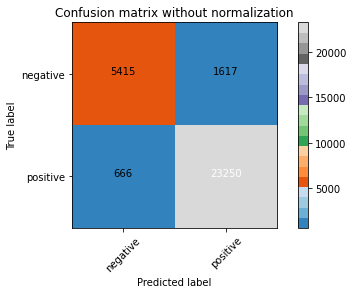

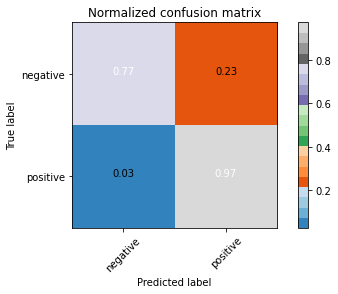

In [45]:
class_names = ['negative','positive']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y2_test, preds2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix without normalization',cmap='tab20c')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix',cmap='tab20c')

plt.show()